<a href="https://colab.research.google.com/github/Abonty18/ML-lab/blob/main/190042118_ML_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK1


In [ ]:
import pandas as pd

df = pd.read_csv('/content/diabetes_dataset.csv')


df.head()
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


TASK2

In [ ]:
feature_names = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[feature_names]
y = df.Outcome
print(X)
print(y)

x_train,x_test,y_train,y_test=train_test_split(df.loc[:,df.columns !='Outcome'],df['Outcome'],test_size=0.3,random_state=111118)

print(f"No. of training examples: {x_train.shape[0]}")
print(f"No. of testing examples: {x_test.shape[0]}")

     Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             72             35        0  33.6   
1         85             66             29        0  26.6   
2        183             64              0        0  23.3   
3         89             66             23       94  28.1   
4        137             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763     

TASK3

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(x_test)
print(y_pred)


TASK4

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       158
           1       0.80      0.67      0.73        73

    accuracy                           0.84       231
   macro avg       0.83      0.80      0.81       231
weighted avg       0.84      0.84      0.84       231

[[146  12]
 [ 24  49]]


TASK5

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
clf = DecisionTreeClassifier(criterion='entropy',max_depth=4)

clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7662337662337663
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       158
           1       0.61      0.73      0.66        73

    accuracy                           0.77       231
   macro avg       0.74      0.76      0.74       231
weighted avg       0.78      0.77      0.77       231

[[124  34]
 [ 20  53]]


TASK6

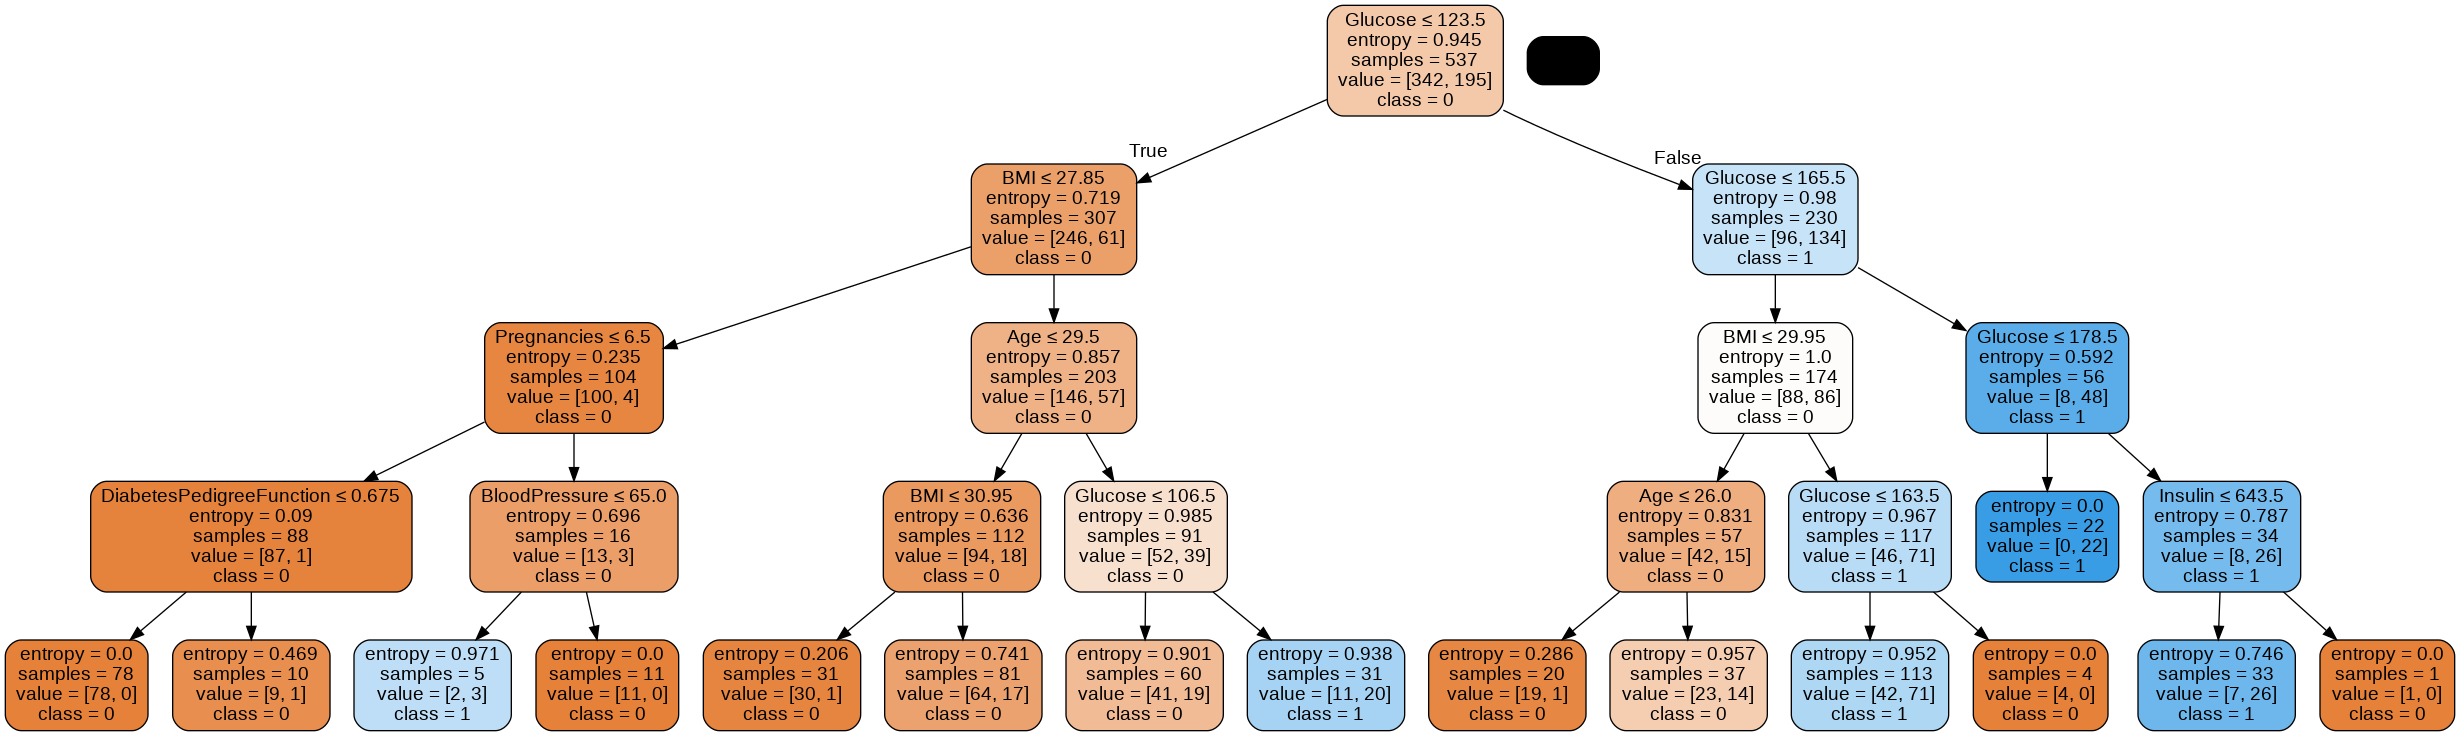

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=x_train.columns,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("databetes_set.png")
Image(graph.create_png())


TASK7

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=18)


logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.86      0.92      0.89       158
           1       0.80      0.67      0.73        73

    accuracy                           0.84       231
   macro avg       0.83      0.80      0.81       231
weighted avg       0.84      0.84      0.84       231

[[146  12]
 [ 24  49]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


TASK8

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

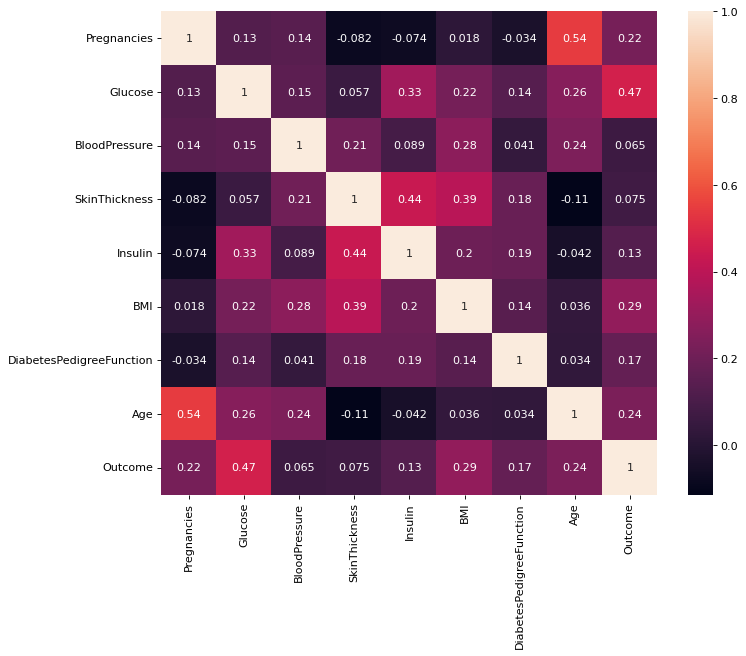

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
print(df.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(),  annot=True)
  
# displaying heatmap
plt.show()

feature_names = ['Glucose', 'BMI']
X = df[feature_names]



In [ ]:
# print(X)
# print(y)

x_train,x_test,y_train,y_test=train_test_split(df.loc[:,df.columns !='Outcome'],df['Outcome'],test_size=0.3,random_state=111118)

print(f"No. of training examples: {x_train.shape[0]}")
print(f"No. of testing examples: {x_test.shape[0]}")

logreg = LogisticRegression(random_state=18)


logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))





No. of training examples: 537
No. of testing examples: 231
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       158
           1       0.80      0.67      0.73        73

    accuracy                           0.84       231
   macro avg       0.83      0.80      0.81       231
weighted avg       0.84      0.84      0.84       231

[[146  12]
 [ 24  49]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
